In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as hr
import dionysus as d
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from src.tda import ClutchMapper, visualize_complex
from src.data_pipeline import query_avg
import plotly.plotly as py

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

plt.style.use('ggplot')

In [3]:
df = query_avg("HAVING position = 'WR'")

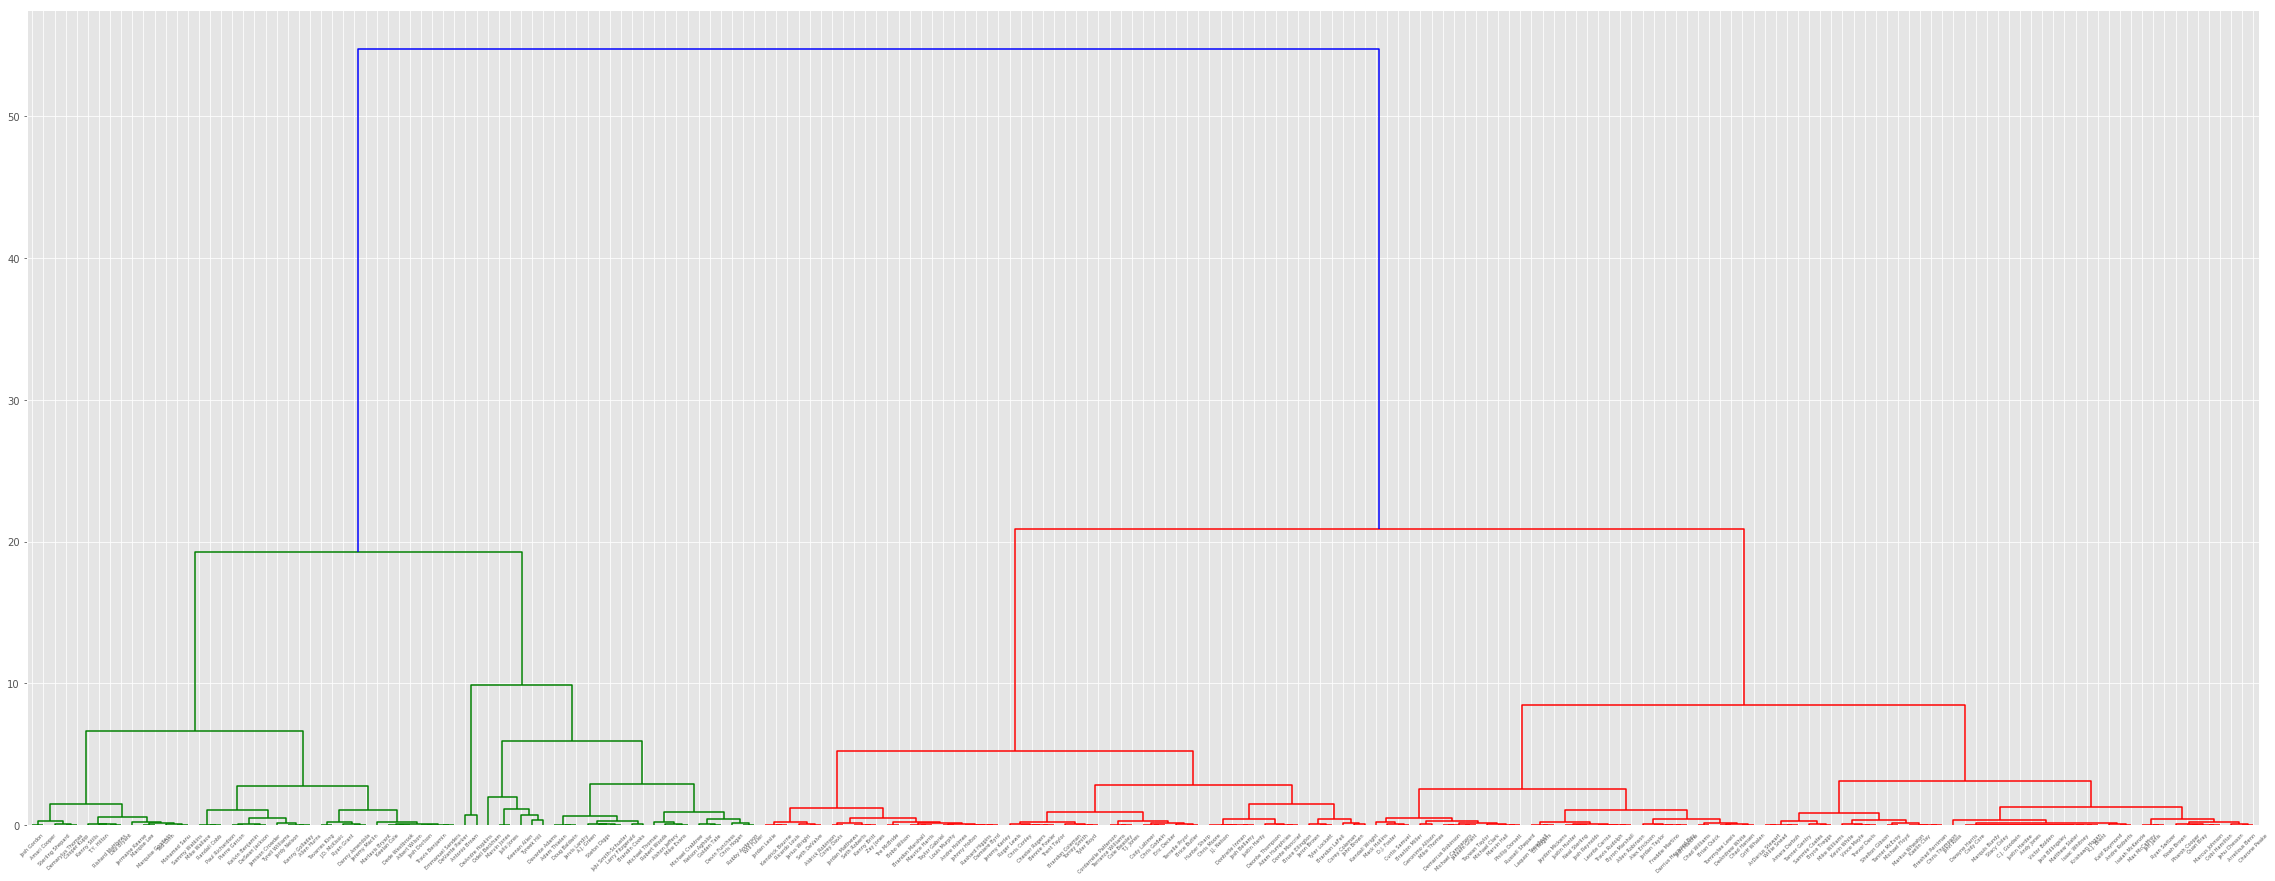

In [4]:
X = df['avg_points'].values.reshape(-1,1)
dist_vector = pdist(X, metric='euclidean')
linkage_mat = hr.linkage(dist_vector, method='ward')
plt.figure(figsize=(40,15));
dendrogram = hr.dendrogram(linkage_mat, labels=df['name'].values);
plt.xticks(rotation=45);
plt.savefig('../plots/dendrogram_ward_linkage_wr')

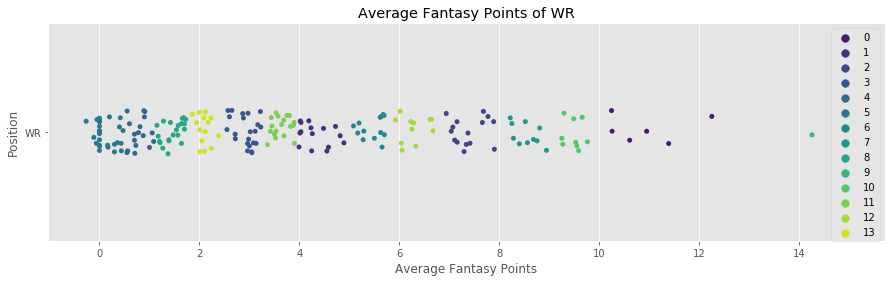

In [5]:
agg = AgglomerativeClustering(n_clusters=14, linkage='ward')
labels = agg.fit_predict(X)

plt.figure(figsize=(15,4));
plt.title('Average Fantasy Points of WR');
sns.stripplot(x="avg_points", y="pos", data=df, hue=labels, palette='viridis', jitter=True);
plt.xlabel('Average Fantasy Points');
plt.ylabel('Position');

In [6]:
stats = df.iloc[:,4:].values

scaler = MinMaxScaler()
scaled_stats = scaler.fit_transform(stats)

cmapper = ClutchMapper()
cmapper.fit(scaled_stats, labels)

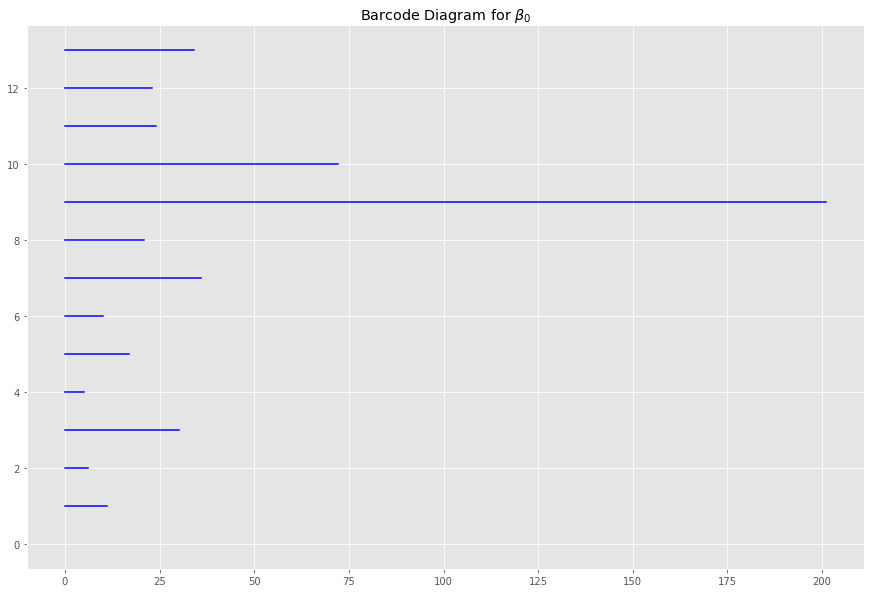

In [7]:
f = cmapper.build_filtration()

ph = d.homology_persistence(f)
dgms = d.init_diagrams(ph, f)

plt.figure(figsize=(15,10));
plt.title('Barcode Diagram for $\\beta_0$');
d.plot.plot_bars(dgms[0], show = True)

In [8]:
for s in f:
    print(s)

<0> 0
<1> 0
<2> 0
<3> 0
<4> 0
<5> 0
<6> 0
<7> 0
<8> 0
<9> 0
<10> 0
<11> 0
<12> 0
<13> 0
<2,4> 5
<0,2> 6
<0,4> 6
<0,2,4> 6
<0,6> 10
<2,6> 10
<4,6> 10
<0,2,6> 10
<0,4,6> 10
<2,4,6> 10
<0,1> 11
<1,2> 11
<1,4> 11
<0,1,2> 11
<0,1,4> 11
<1,2,4> 11
<1,6> 12
<0,1,6> 12
<1,2,6> 12
<1,4,6> 12
<2,5> 17
<4,5> 17
<2,4,5> 17
<0,5> 18
<1,5> 18
<0,1,5> 18
<0,2,5> 18
<0,4,5> 18
<1,2,5> 18
<1,4,5> 18
<5,6> 19
<0,5,6> 19
<1,5,6> 19
<2,5,6> 19
<4,5,6> 19
<0,8> 21
<1,8> 21
<2,8> 21
<4,8> 21
<5,8> 21
<6,8> 21
<0,1,8> 21
<0,2,8> 21
<0,4,8> 21
<0,5,8> 21
<0,6,8> 21
<1,2,8> 21
<1,4,8> 21
<1,5,8> 21
<1,6,8> 21
<2,4,8> 21
<2,5,8> 21
<2,6,8> 21
<4,5,8> 21
<4,6,8> 21
<5,6,8> 21
<0,12> 23
<1,12> 23
<2,12> 23
<4,12> 23
<6,12> 23
<0,1,12> 23
<0,2,12> 23
<0,4,12> 23
<0,6,12> 23
<1,2,12> 23
<1,4,12> 23
<1,6,12> 23
<2,4,12> 23
<2,6,12> 23
<4,6,12> 23
<0,11> 24
<1,11> 24
<2,11> 24
<4,11> 24
<6,11> 24
<0,1,11> 24
<0,2,11> 24
<0,4,11> 24
<0,6,11> 24
<1,2,11> 24
<1,4,11> 24
<1,6,11> 24
<2,4,11> 24
<2,6,11> 24
<4,6,11> 24
<5

In [ ]:
wr_complex = cmapper.build_complex(165)

fig = visualize_complex(wr_complex, 'WR Complex')
py.iplot(fig, filename='wr_complex')

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan
(see: https://plot.ly/products/cloud ).

Here 9, and 10 seem to be significantly different.

In [ ]:
col_list = ['name']

for col in df.columns[3:]:
    if df[col].max() > 0:
        col_list.append(col)

In [ ]:
df['label'] = labels
df.loc[df['label'] == 9, col_list]

In [ ]:
(df.loc[df['label'] == 9, col_list[1:]].mean() - df[col_list[1:]].mean()) / df[col_list[1:]].std()

These guys are obviously high performers even amongst the WR1 tier.

In [ ]:
df.loc[df['label'] == 10, col_list]

This is an interesting one, since they seem to be not quite WR1 material, but high WR2.

In [ ]:
(df.loc[df['label'] == 10, col_list[1:]].mean() - df[col_list[1:]].mean()) / df[col_list[1:]].std()

In [ ]:
df.loc[df['label'].isin([0,1,2,3,4,5,6,7,8,11,12,13]), col_list]

In [ ]:
wr_complex